<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/Fun%C3%A7%C3%A3o_de_transfer%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Usando `scipy` (OPCIONAL)

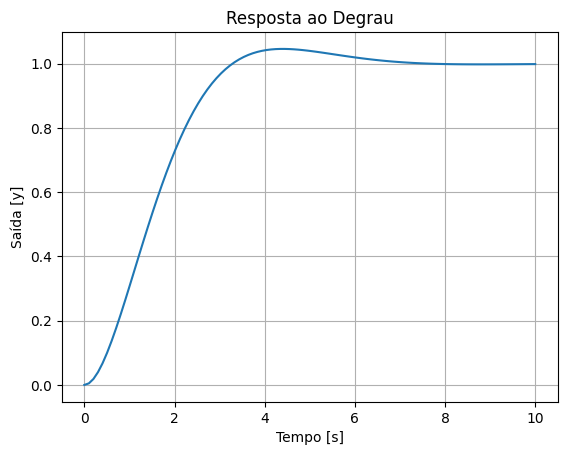

In [67]:
from scipy import signal
import matplotlib.pyplot as plt

# Definindo os parâmetros
K = 1.0        # Ganho
tau = 1.0      # Período
xi = 0.7       # Fator de amortecimento

# Definindo o numerador e denominador
num = [K]  # Numerador
den = [tau**2, 2*xi*tau, 1]  # Denominador

# Criando a função de transferência
G = signal.TransferFunction(num, den)

# Calculando a resposta ao degrau
t, y = signal.step(G)

# Plotando a resposta
plt.plot(t, y)
plt.title("Resposta ao Degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Saída [y]")
plt.grid(True)
plt.show()

# Usando python-control

## Instalando e importando as bibliotecas

In [73]:
! pip install -qq control

In [72]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Ajustando o tamanho da fonte de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 25px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [78]:
# Sistemas de primeira ordem
G1 = ct.tf([5],[2,1])
G2 = ct.tf([2],[0.1,1])
G1

TransferFunction(array([5]), array([2, 1]))

In [81]:
# Sistemas de segunda ordem
s = ct.tf("s")
G3 = 15/(1.5*s**2 + 0.4*s + 3)
G4 = 15/(1.5*s**2 + 6*s + 3)
G3

TransferFunction(array([15]), array([1.5, 0.4, 3. ]))

## Algumas funções especiais

In [84]:
# Obter propriedades dos sistemas
G = [G1, G2, G3, G4]
for g in G:
  print(g.poles())

[-0.5+0.j]
[-10.+0.j]
[-0.13333333+1.40791414j -0.13333333-1.40791414j]
[-3.41421356+0.j -0.58578644+0.j]


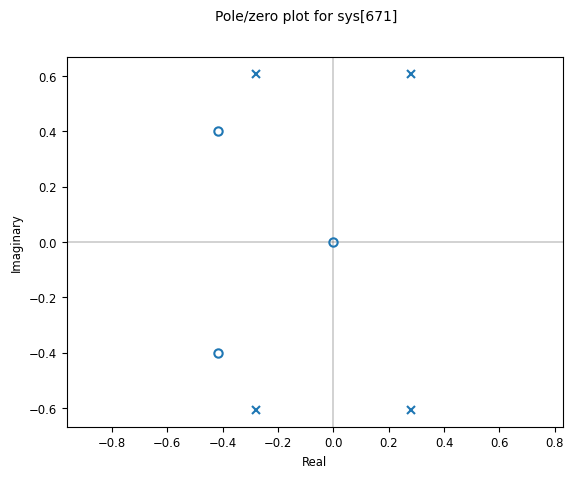

In [85]:
G5 = (3*s**3 + 2.5*s**2 + s)/(5*s**4 + 2.9*s**2 + 1)
ct.pzmap(G5);

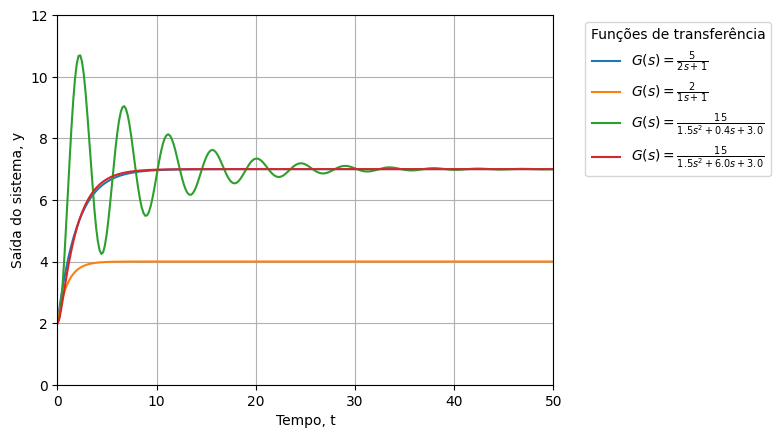

In [ ]:
# Resposta ao degrau (step)
delta = 1
y0 = 2
for g in G:
  # Resposta ao degrau
  t, y = ct.step_response(g, T=50)

  # Obtém os coeficientes do numerador e denominador para exibir na legenda
  num = g.num[0][0]  # Coeficientes do numerador
  den = g.den[0][0]  # Coeficientes do denominador

  # Formatação da legenda dependendo da ordem
  if len(den) == 2:  # Sistema de 1ª ordem
      label_text = rf"$G(s) = \frac{{{num[0]}}}{{{den[0]}s + {den[1]}}}$"
  elif len(den) == 3:  # Sistema de 2ª ordem
      label_text = rf"$G(s) = \frac{{{num[0]}}}{{{den[0]}s^2 + {den[1]}s + {den[2]}}}$"

  # Saída gráfica
  plt.plot(t, y0 + delta*y, label = label_text)

plt.xlabel('Tempo, t')
plt.ylabel('Saída do sistema, y')
plt.legend(title="Funções de transferência", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis([0, 50, 0, 12])
plt.grid()